In [0]:
import math
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
mpl.rcParams['figure.dpi'] = 150


# Data Preparation

Input Data Set dengan cara mengupload dataset air_bnb.csv


In [3]:
from google.colab import files
uploded = files.upload()

Saving air_bnb.csv to air_bnb.csv


In [4]:
dataset = pd.read_csv(io.BytesIO(uploded['air_bnb.csv']))
df = pd.DataFrame(data=dataset)

df.shape

(22552, 16)

In [5]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,2217,Ian,Mitte,Brunnenstr. Süd,52.534537,13.402557,Entire home/apt,60,4,118,2018-10-28,3.76,4,141
1,2695,Prenzlauer Berg close to Mauerpark,2986,Michael,Pankow,Prenzlauer Berg Nordwest,52.548513,13.404553,Private room,17,2,6,2018-10-01,1.42,1,0
2,3176,Fabulous Flat in great Location,3718,Britta,Pankow,Prenzlauer Berg Südwest,52.534996,13.417579,Entire home/apt,90,62,143,2017-03-20,1.25,1,220
3,3309,BerlinSpot Schöneberg near KaDeWe,4108,Jana,Tempelhof - Schöneberg,Schöneberg-Nord,52.498855,13.349065,Private room,26,5,25,2018-08-16,0.39,1,297
4,7071,BrightRoom with sunny greenview!,17391,Bright,Pankow,Helmholtzplatz,52.543157,13.415091,Private room,42,2,197,2018-11-04,1.75,1,26


Mencari Kolom yang ada Missing Value

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,18638.000000,22552.000000,22552.000000
mean,1.571560e+07,5.403355e+07,52.509824,13.406107,67.143668,7.157059,17.840679,1.135525,1.918233,79.852829
std,8.552069e+06,5.816290e+07,0.030825,0.057964,220.266210,40.665073,36.769624,1.507082,3.667257,119.368162
min,2.015000e+03,2.217000e+03,52.345803,13.103557,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.065954e+06,9.240002e+06,52.489065,13.375411,30.000000,2.000000,1.000000,0.180000,1.000000,0.000000
50%,1.686638e+07,3.126711e+07,52.509079,13.416779,45.000000,2.000000,5.000000,0.540000,1.000000,4.000000
75%,2.258393e+07,8.067518e+07,52.532669,13.439259,70.000000,4.000000,16.000000,1.500000,1.000000,129.000000
max,2.986735e+07,2.245081e+08,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


In [7]:
df[df['reviews_per_month'].notnull()].describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.863800e+04,1.863800e+04,18638.000000,18638.000000,18638.000000,18638.000000,18638.000000,18638.000000,18638.000000,18638.000000
mean,1.527258e+07,5.187932e+07,52.509917,13.406349,62.422846,6.531978,21.577959,1.135525,1.931162,84.179418
std,8.454617e+06,5.655345e+07,0.030535,0.057212,159.717760,43.103583,39.432143,1.507082,3.761186,120.485582
min,2.015000e+03,2.217000e+03,52.345803,13.103557,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,7.792106e+06,8.592354e+06,52.489177,13.376414,30.000000,2.000000,3.000000,0.180000,1.000000,0.000000
50%,1.642057e+07,2.896518e+07,52.509198,13.416881,46.000000,2.000000,7.000000,0.540000,1.000000,8.000000
75%,2.217936e+07,7.707587e+07,52.532656,13.439092,70.000000,4.000000,21.000000,1.500000,1.000000,144.000000
max,2.984956e+07,2.242958e+08,52.641499,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


mengatasi missing value bisa menggunakan angka 0 ,median atau mean

In [0]:
# #missing value pada review_per_month diisi dengan angka 0
# df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# pake mean
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(),inplace=True)

# pake median
#df['reviews_per_month'].fillna(df['reviews_per_month'].median(),inplace=True)



In [9]:
#ngecek apakah missing value sudah teratasi atau belum
df.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.255200e+04,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000
mean,1.571560e+07,5.403355e+07,52.509824,13.406107,67.143668,7.157059,17.840679,1.135525,1.918233,79.852829
std,8.552069e+06,5.816290e+07,0.030825,0.057964,220.266210,40.665073,36.769624,1.370068,3.667257,119.368162
min,2.015000e+03,2.217000e+03,52.345803,13.103557,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,8.065954e+06,9.240002e+06,52.489065,13.375411,30.000000,2.000000,1.000000,0.220000,1.000000,0.000000
50%,1.686638e+07,3.126711e+07,52.509079,13.416779,45.000000,2.000000,5.000000,0.840000,1.000000,4.000000
75%,2.258393e+07,8.067518e+07,52.532669,13.439259,70.000000,4.000000,16.000000,1.180000,1.000000,129.000000
max,2.986735e+07,2.245081e+08,52.651670,13.757642,9000.000000,5000.000000,498.000000,36.670000,45.000000,365.000000


Menentukan feature dan label

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
#mengencode roomtype dari string ke integer
label_encoder = LabelEncoder()
integer_encode = label_encoder.fit_transform(df['room_type'])
df['room_type'] = integer_encode

In [0]:
# #ngecek jumlah type yang ada di kolom calculated
# df.groupby("room_type").count()

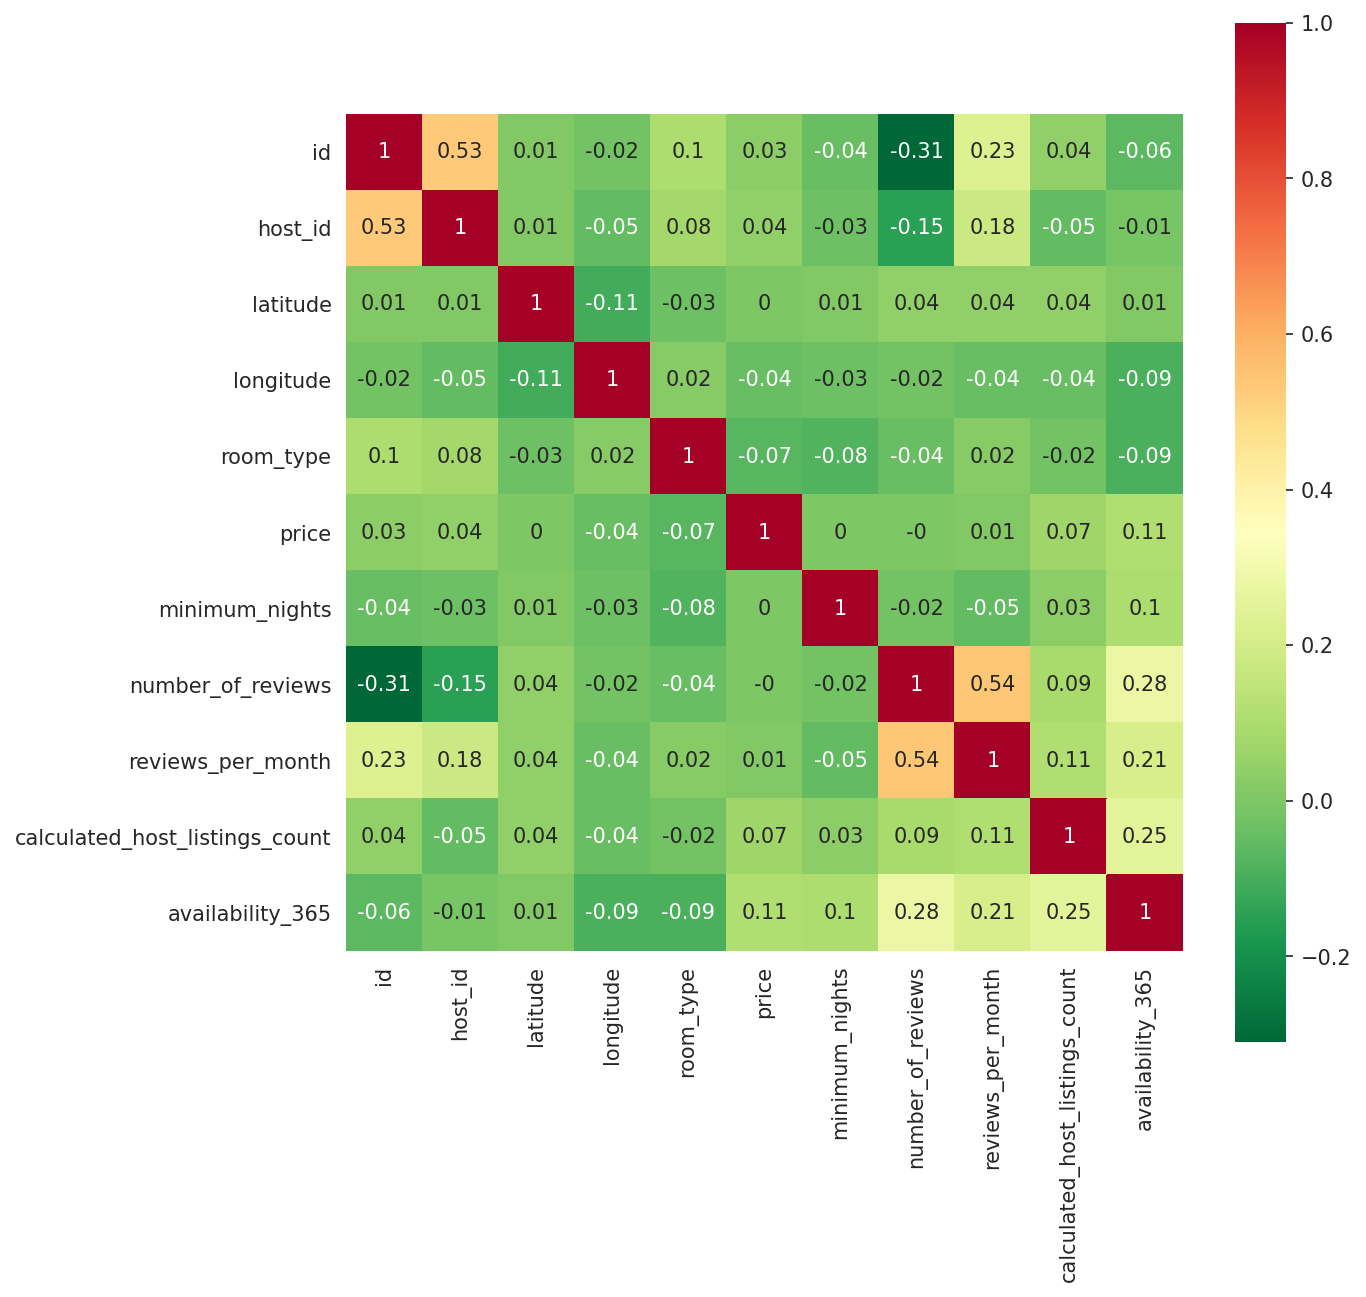

In [13]:
#melihat korelasi data antar kolom
correlation = df.corr()
plt.subplots(figsize = (9,9))
sns.heatmap(correlation.round(2), 
            annot = True, 
            vmax = 1, 
            square = True, 
            cmap = 'RdYlGn_r')
plt.show()

In [14]:
#saya memilih label roomtype karena mempunya type yang paling sedikit diantara yang lainnya
df.groupby("room_type").count()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,,,,,,
0,10722,10693,10722,10709,10722,10722,10722,10722,10722,10722,10722,8864,10722,10722,10722
1,11534,11506,11534,11521,11534,11534,11534,11534,11534,11534,11534,9561,11534,11534,11534
2,296,294,296,296,296,296,296,296,296,296,296,219,296,296,296


In [0]:
#saya memilih fitur id dan host_id karena keduanya memiliki korelasi yang paling bagus dengan roomtype berdasarkan heatmap
list_featlab = ['id','host_id','room_type']
df_FeatLab = df[list_featlab]


<Figure size 9000x9000 with 0 Axes>

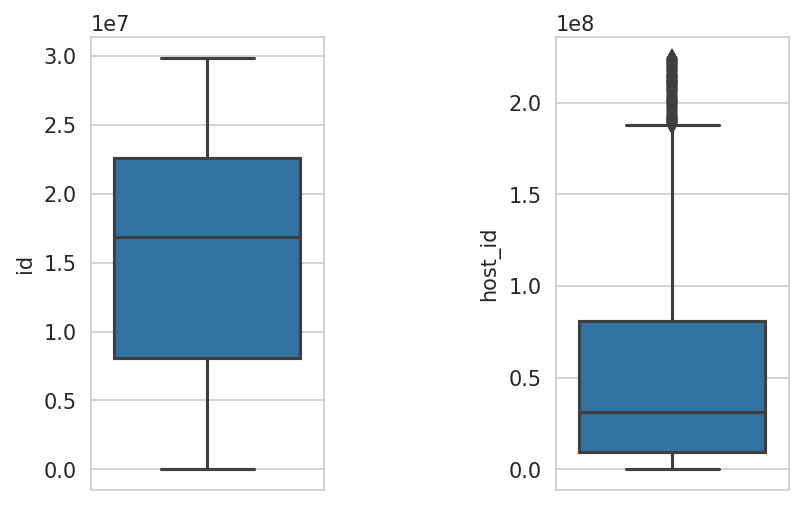

In [16]:
mpl.rcParams['figure.dpi'] = 150
plt.figure(figsize=(60, 60))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df_FeatLab["id"], ax=axes[0])
sns.boxplot(y=df_FeatLab["host_id"], ax=axes[1])
plt.subplots_adjust(wspace=1)
plt.show()

In [17]:
#mengatasi outlier
Q1 = df_FeatLab.quantile(0.25)
Q3 = df_FeatLab.quantile(0.75)

FeatLab_IQR = Q3 - Q1

print(FeatLab_IQR)

id           14517977.25
host_id      71435174.75
room_type           1.00
dtype: float64


In [0]:
#update data yang sudah diatasi outliernya
df_NewFeatLab = df_FeatLab[~((df_FeatLab < (Q1 - 1.5 * FeatLab_IQR)) | (df_FeatLab > (Q3 + 1.5 * FeatLab_IQR))).any(axis=1)]


<Figure size 9000x9000 with 0 Axes>

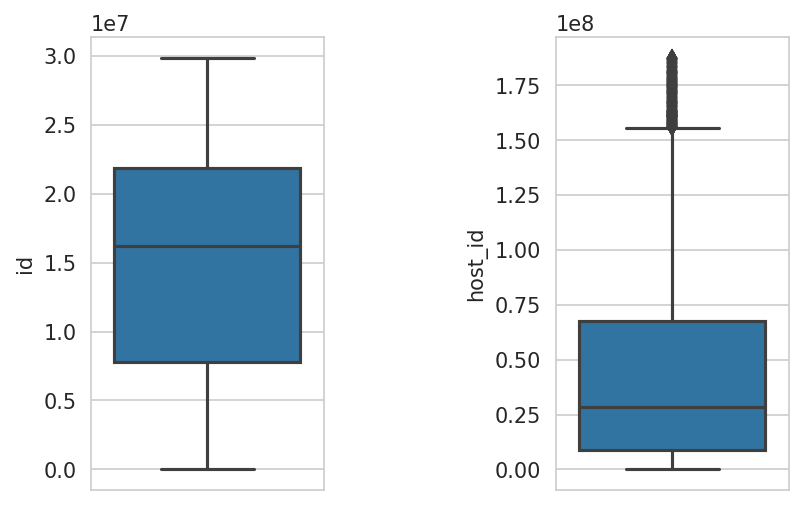

In [19]:
mpl.rcParams['figure.dpi'] = 150
plt.figure(figsize=(60, 60))
f, axes = plt.subplots(1, 2)
sns.boxplot(y=df_NewFeatLab["id"], ax=axes[0])
sns.boxplot(y=df_NewFeatLab["host_id"], ax=axes[1])
plt.subplots_adjust(wspace=1)
plt.show()

In [20]:
df_NewFeatLab.shape

(21509, 3)

In [0]:
#export to csv
df_NewFeatLab.to_csv('hasil_data_eksplorasi_Classification.csv')

In [0]:
df_NewLabel = df_NewFeatLab['room_type'] 


In [0]:
df_NewFeature = df_NewFeatLab[['id','host_id']]

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
#split data
x_train, x_test, y_train, y_test = train_test_split(df_NewFeature, df_NewLabel,test_size=0.25,random_state=42)

#pemodelan 1 menggunakan naive bayes 

menggunakan data yang sudah diatasi outliernya

In [26]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(x_train, y_train)

CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
hasil = clf.predict(x_test)
print(hasil)

[0 1 1 ... 1 1 0]


In [28]:
clf.score(x_test,y_test)*100 

57.90256600966902

In [0]:
from sklearn.metrics import classification_report,accuracy_score


evaluasi akurasi

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,hasil)*100,"%")

57.90256600966902 %


classification report berupa  macro accuracy, weighted accuracy

In [31]:
#report clasification
print("classification report")
print(classification_report(y_test,hasil))

classification report
              precision    recall  f1-score   support

           0       0.81      0.17      0.28      2529
           1       0.55      0.96      0.70      2784
           2       0.00      0.00      0.00        65

    accuracy                           0.58      5378
   macro avg       0.45      0.38      0.33      5378
weighted avg       0.67      0.58      0.50      5378



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Pemodelan 2 menggunakan SVM

menggunakan data yang tidak diatasi outliernya

In [0]:
list_feature = ['id','host_id']
df_feature = df[list_feature]
df_label = df['room_type']

In [0]:
#split data
x_train, x_test, y_train, y_test = train_test_split(df_feature, df_label,test_size=0.25,random_state=42)

In [0]:
from sklearn import svm

In [35]:
clf = svm.SVC()
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
result = clf.predict(x_test)

evaluasi akurasi

In [38]:
print(accuracy_score(y_test,result)*100,"%")

57.85739623980135 %


classification report berupa evaluasi macro accuracy, weighted accuracy

In [39]:
print("classification report")
print(classification_report(y_test,result))

classification report
              precision    recall  f1-score   support

           0       0.59      0.36      0.45      2614
           1       0.57      0.79      0.66      2959
           2       0.00      0.00      0.00        65

    accuracy                           0.58      5638
   macro avg       0.39      0.38      0.37      5638
weighted avg       0.57      0.58      0.55      5638



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
